For the sake of interactive display in Jupyter, we will enable matplotlib inline.

In [2]:
%matplotlib inline

### Task 1.1

In [4]:
import datetime
#read csv files
df = pd.read_csv('2021-Q1.csv', sep=',', engine='python', parse_dates=['Starttime'])
df=df.append(pd.read_csv('2021-Q2.csv', sep=',', engine='python', parse_dates=['Starttime']))
df=df.append(pd.read_csv('2021-Q3.csv', sep=',', engine='python', parse_dates=['Starttime']))
df=df.dropna()

st =  psql.sqldf("select distinct([From station id]) as d from df")

#format the data types
df["From station id"]=df["From station id"].astype(int)
df["To station id"]=df["To station id"].astype(int)
df["Date"] = df["Starttime"].dt.date

# Extract year, month and day
# X["Year"] = X["Start_Time"].dt.year
df["Month"] = df["Starttime"].dt.month
df["Day"] = df["Starttime"].dt.day


# pap =  psql.sqldf("select Date,[From station id],count(*) from df group by Date,[From station id] order by Date")
# print(pap.head(20))
##TASK 1.1
df3 = df.groupby(['Date', 'From station id']).size().reset_index(name='fromCNT')
df3.rename(columns = {'From station id':'station id'}, inplace = True)
df4 = df.groupby(['Date', 'To station id']).size().reset_index(name='toCNT')
df4.rename(columns = {'To station id':'station id'}, inplace = True)

df1=pd.merge(df3, df4, on=['Date','station id'],how='outer')
# df1[is.na(df1)] <- 0 
df1 = df1.fillna(0)
df1=pd.DataFrame(df1,columns=['Date', 'station id', 'fromCNT', 'toCNT', 'rebalCNT'])
p =  psql.sqldf("select Bikeid,Starttime,[From station id],[To station id],Date from df order by Bikeid,Starttime")
dic={}
dates =  psql.sqldf("select distinct(Date) as d from df")

#dic[date][station]=rebalcnt of that station for that date
for i in dates["d"]:
    dic[i]={}
    for j in st["d"]:
        dic[i][j]=0
for j in range(0,len(p)-1):
    k=j+1
    if(p['Bikeid'][j]==p['Bikeid'][k]):
        if(p['To station id'][j]!=p['From station id'][k]):
            dic[p['Date'][k]][p['From station id'][k]]+=1

df1["Date"]=df1["Date"].astype(str)
# updating rebalcnt into output df.
for i in range(len(df1)):
    s=df1.iloc[i,1]
    d=df1.iloc[i,0]
    df1.iloc[i,4]=dic[d][s]
df1=psql.sqldf("select * from df1 group by Date,[station id]")
print(df1.head(20))
#print(df1[df1["rebalCNT"]!=0])
ss=0
for i in range(len(df1)):
    ss+=df1.iloc[i,2]
# print(ss)
# print(df.shape[0])

          Date  station id  fromCNT  toCNT  rebalCNT
0   2021-01-01        1002      1.0    1.0       0.0
1   2021-01-01        1010      1.0    0.0       0.0
2   2021-01-01        1017      0.0    2.0       0.0
3   2021-01-01        1024      1.0    0.0       0.0
4   2021-01-01        1028      0.0    1.0       0.0
5   2021-01-01        1032      1.0    0.0       0.0
6   2021-01-01        1039      0.0    1.0       0.0
7   2021-01-01        1059      1.0    1.0       0.0
8   2021-01-01        1062      2.0    2.0       0.0
9   2021-01-01        1094      1.0    0.0       0.0
10  2021-01-01       49301      1.0    2.0       0.0
11  2021-01-01       49641      0.0    1.0       0.0
12  2021-01-01       49671      1.0    0.0       0.0
13  2021-01-01       49951      1.0    0.0       0.0
14  2021-01-02        1000      1.0    0.0       0.0
15  2021-01-02        1001      2.0    3.0       0.0
16  2021-01-02        1002      3.0    1.0       0.0
17  2021-01-02        1003      2.0    0.0    

### Task 1.2

In [5]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1["Month"]=df1["Date"].dt.month
df2 =  psql.sqldf("select Month,[station id],sum(fromCNT) as fromCNT,sum(toCNT) as toCNT,sum(rebalCNT) as rebalCNT from df1 group by Month,[station id]")
print(df2.head(20))

    Month  station id  fromCNT  toCNT  rebalCNT
0       1        1000     22.0   28.0       1.0
1       1        1001     18.0   26.0       1.0
2       1        1002     27.0   27.0       3.0
3       1        1003      2.0    1.0       0.0
4       1        1004     20.0   16.0       2.0
5       1        1005      5.0    3.0       0.0
6       1        1006      8.0    8.0       1.0
7       1        1007      7.0    5.0       1.0
8       1        1009      8.0    3.0       0.0
9       1        1010     46.0   30.0      11.0
10      1        1011      6.0   16.0       0.0
11      1        1012     50.0   52.0       2.0
12      1        1013     25.0   24.0       7.0
13      1        1014      5.0    2.0       1.0
14      1        1015     15.0   15.0       2.0
15      1        1016     21.0   28.0       0.0
16      1        1017     61.0   70.0       0.0
17      1        1018     12.0   18.0       0.0
18      1        1019     15.0   31.0       0.0
19      1        1020      4.0    5.0   

---
### Task 2

In this task you will need to create graphs to show the popularity of the different rental stations, given filter conditions.

In [6]:
# FILTER VARIABLES -- feel free to edit the values, but the names of the variables must remain 
#                     as they are and should be used by your code accordingly from this point on

filter_month = 4
filter_stationID = 1046


### Task 2.1

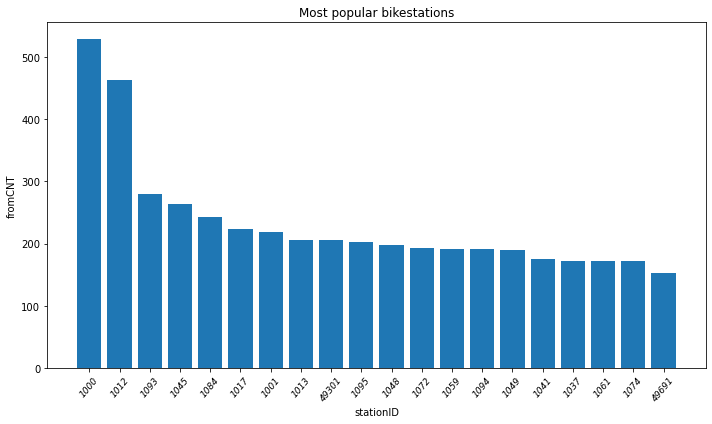

In [7]:
import pandasql as psql
filter_month=4
filter_stationID=1046
query="select [station id],fromCNT from df2 where Month="+str(filter_month)+" order by fromCNT desc LIMIT 20"
sdf =  psql.sqldf(query)
# print(sdf)
fig = plt.figure(figsize=(10, 6),tight_layout=True)
sdf["station id"]=sdf["station id"].astype(str)
plt.bar(sdf['station id'],sdf['fromCNT'],align = 'center')
plt.xticks(rotation = 50, fontsize = 9,style='italic')
plt.xlabel('stationID')
plt.ylabel('fromCNT')
plt.title('Most popular bikestations')
plt.show()

### Task 2.2

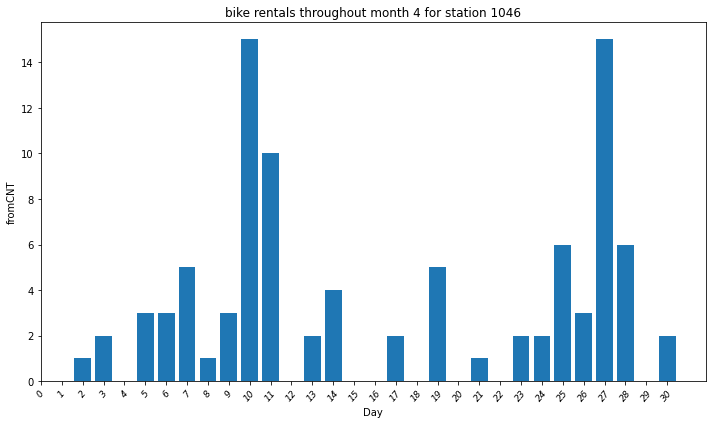

In [8]:
df1["Date"] = pd.to_datetime(df1["Date"])
df1["Day"]=df1["Date"].dt.day
# df1["Month"]=df1["Date"].dt.month
sdf =  psql.sqldf("select Day,fromCNT from df1 where Month="+str(filter_month)+" and [station id]="+str(filter_stationID)+" order by Day")
noofdays=31
if(filter_month==2):
    noofdays=29
elif(filter_month in [4,6,9,11]):
    noofdays=30
# sdf["Day"]=sdf["Day"].astype(str)
fig = plt.figure(figsize=(10, 6),tight_layout=True)
plt.bar(sdf['Day'],sdf['fromCNT'],align = 'center')
# plt.xticks(np.arange(0, max(sdf['Day'])+1, 1.0))
plt.xticks(np.arange(0, noofdays+1, 1.0))
plt.xticks(rotation = 50, fontsize = 9,style='italic')
plt.xlabel('Day')
plt.ylabel('fromCNT')
plt.title('bike rentals throughout month '+str(filter_month)+" for station "+str(filter_stationID))
plt.show()
# print(sdf)

### Task 2.3

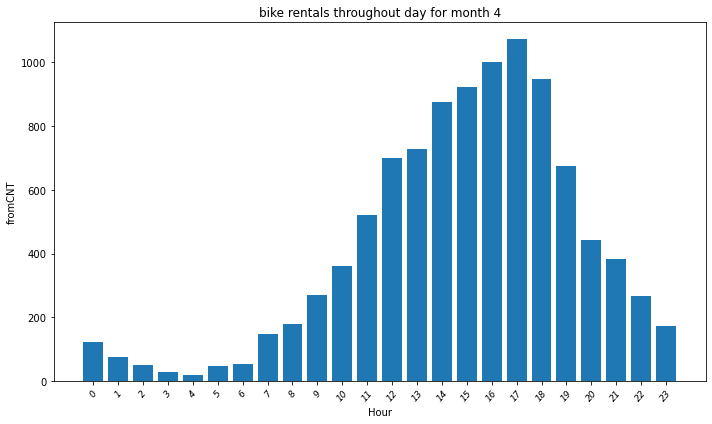

In [9]:
df["Hour"]=df["Starttime"].dt.hour
monthdf=psql.sqldf("select * from df where Month="+str(filter_month))
sdf =  psql.sqldf("select Hour,count(*) as fromCNT from monthdf group by Hour order by Hour")
##print(sdf)
fig = plt.figure(figsize=(10, 6),tight_layout=True)
# sdf["Hour"]=sdf["Hour"].astype(str)
plt.bar(sdf['Hour'],sdf['fromCNT'],align = 'center')
plt.xticks(np.arange(0, max(sdf["Hour"])+1, 1.0))
plt.xticks(rotation = 50, fontsize = 9,style='italic')
plt.xlabel('Hour')
plt.ylabel('fromCNT')
plt.title('bike rentals throughout day for month '+str(filter_month))
plt.show()

### Task 2.4

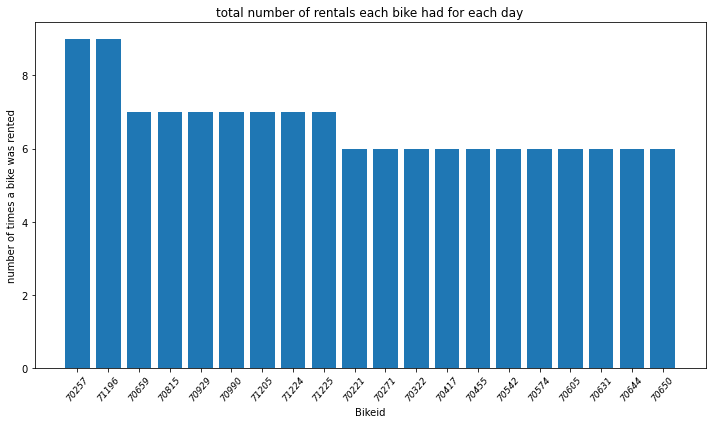

In [10]:
sdf =  psql.sqldf("select Bikeid,Date,count(*) as cnt from monthdf group by Bikeid,Date order by cnt desc limit 20")
fig = plt.figure(figsize=(10, 6),tight_layout=True)
sdf["Bikeid"]=sdf["Bikeid"].astype(str)
plt.bar(sdf['Bikeid'],sdf['cnt'],align = 'center')
plt.xticks(rotation = 50, fontsize = 9,style='italic')
plt.xlabel('Bikeid')
plt.ylabel('number of times a bike was rented')
plt.title('total number of rentals each bike had for each day')
plt.show()

---
### Task 3

In this task you will create graphs to show the rebalancing issue.

### Task 3.1

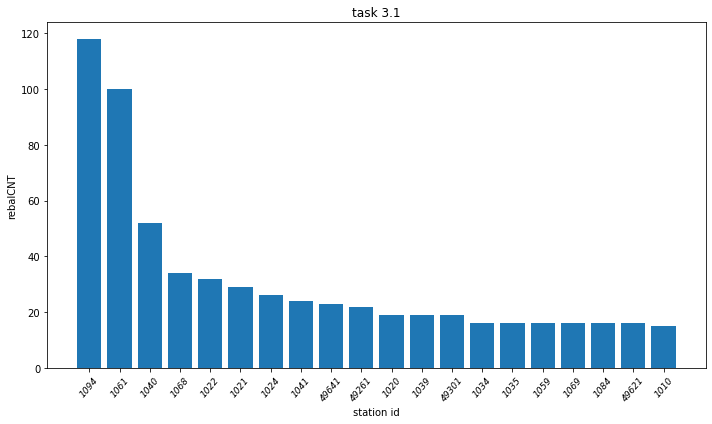

In [11]:
#task 3.1
sdf =  psql.sqldf("select [station id], rebalCNT from df2 where Month="+str(filter_month)+" order by rebalCNT desc limit 20")
fig = plt.figure(figsize=(10, 6),tight_layout=True)
sdf["station id"]=sdf["station id"].astype(str)
plt.bar(sdf['station id'],sdf['rebalCNT'],align = 'center')
plt.xticks(rotation = 50, fontsize = 9,style='italic')
plt.xlabel('station id')
plt.ylabel('rebalCNT')
plt.title('task 3.1')
plt.show()


### Task 3.2

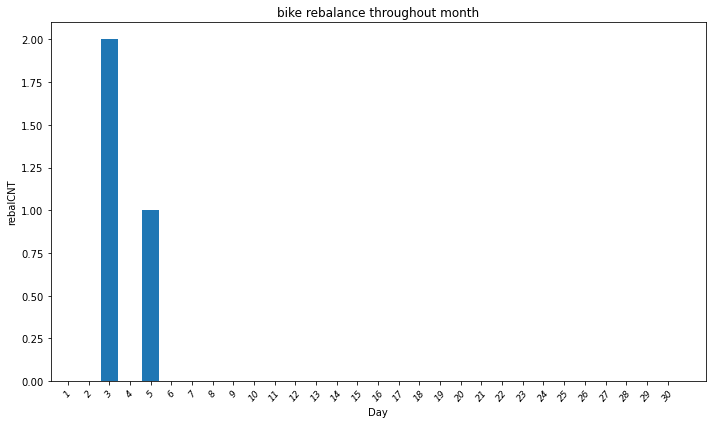

In [12]:
#task 3.2
sdf =  psql.sqldf("select Day,rebalCNT from df1 where Month="+str(filter_month)+" and [station id]="+str(filter_stationID)+" order by Day")
# print(sdf)
# sdf["Day"]=sdf["Day"].astype(str)
fig = plt.figure(figsize=(10, 6),tight_layout=True)
plt.bar(sdf['Day'],sdf['rebalCNT'],align = 'center')
noofdays=31
if(filter_month==2):
    noofdays=29
elif(filter_month in [4,6,9,11]):
    noofdays=30
plt.xticks(np.arange(1, noofdays+1, 1.0))
plt.xticks(rotation = 50, fontsize = 9,style='italic')
plt.xlabel('Day')
plt.ylabel('rebalCNT')
plt.title('bike rebalance throughout month')
plt.show()

---
### Task 4

In this task you will cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.

### Task 4.1

In [13]:
df3 =  psql.sqldf("select [station id],fromCNT as a from df2 where month=4")
df4 =  psql.sqldf("select [station id],fromCNT as b from df2 where month=5")
df4=pd.merge(df3, df4, on=['station id'],how='outer')
df4 = df4.fillna(0)
df3 =  psql.sqldf("select [station id],fromCNT as c from df2 where month=6")
df4=pd.merge(df4, df3, on=['station id'],how='outer')
df4 = df4.fillna(0)
df3 =  psql.sqldf("select [station id],rebalCNT as d from df2 where month=4")
df5 =  psql.sqldf("select [station id],rebalCNT as e from df2 where month=5")
df5=pd.merge(df3, df5, on=['station id'],how='outer')
df5 = df5.fillna(0)
df4=pd.merge(df4, df5, on=['station id'],how='outer')
df4 = df4.fillna(0)
df3 =  psql.sqldf("select [station id],rebalCNT as f from df2 where month=6")
df4=pd.merge(df4, df3, on=['station id'],how='outer')
df4 = df4.fillna(0)
df4.rename(columns={'a': 'fromCNT_4', 'b': 'fromCNT_5','c':'fromCNT_6','d':'rebalCNT_4','e':'rebalCNT_5','f':'rebalCNT_6'}, inplace=True)
print(df4)
#k-means
k_means3 = cluster.KMeans(n_clusters=3, init='k-means++', random_state=5000)
k_means3.fit(df4[['fromCNT_4','fromCNT_5','fromCNT_6','rebalCNT_4','rebalCNT_5','rebalCNT_6']])

k_means4 = cluster.KMeans(n_clusters=4, init='k-means++', random_state=5000)
k_means4.fit(df4[['fromCNT_4','fromCNT_5','fromCNT_6','rebalCNT_4','rebalCNT_5','rebalCNT_6']])

k_means5 = cluster.KMeans(n_clusters=5, init='k-means++', random_state=5000)
k_means5.fit(df4[['fromCNT_4','fromCNT_5','fromCNT_6','rebalCNT_4','rebalCNT_5','rebalCNT_6']])
#db scan
db1 = DBSCAN(eps=40, min_samples=3)
db1.fit(df4[['fromCNT_4','fromCNT_5','fromCNT_6','rebalCNT_4','rebalCNT_5','rebalCNT_6']])
db2 = DBSCAN(eps=53, min_samples=4)
db2.fit(df4[['fromCNT_4','fromCNT_5','fromCNT_6','rebalCNT_4','rebalCNT_5','rebalCNT_6']])
db3 = DBSCAN(eps=70, min_samples=2)
db3.fit(df4[['fromCNT_4','fromCNT_5','fromCNT_6','rebalCNT_4','rebalCNT_5','rebalCNT_6']])


     station id  fromCNT_4  fromCNT_5  fromCNT_6  rebalCNT_4  rebalCNT_5  \
0          1000      529.0      796.0      712.0        13.0        13.0   
1          1001      219.0      316.0      336.0        11.0        16.0   
2          1002      138.0       91.0      129.0         7.0        11.0   
3          1003       39.0       84.0       81.0         4.0         5.0   
4          1004      109.0      113.0       83.0         4.0         5.0   
..          ...        ...        ...        ...         ...         ...   
104       49921       83.0      115.0       90.0         9.0         7.0   
105       49951       83.0      129.0      126.0         8.0         6.0   
106       88887        1.0        0.0        0.0         1.0         0.0   
107       49941        0.0       20.0       69.0         0.0         7.0   
108       88883        0.0        0.0        0.0         0.0         0.0   

     rebalCNT_6  
0          36.0  
1          16.0  
2          12.0  
3           4.0

DBSCAN(eps=70, min_samples=2)

### Task 4.2

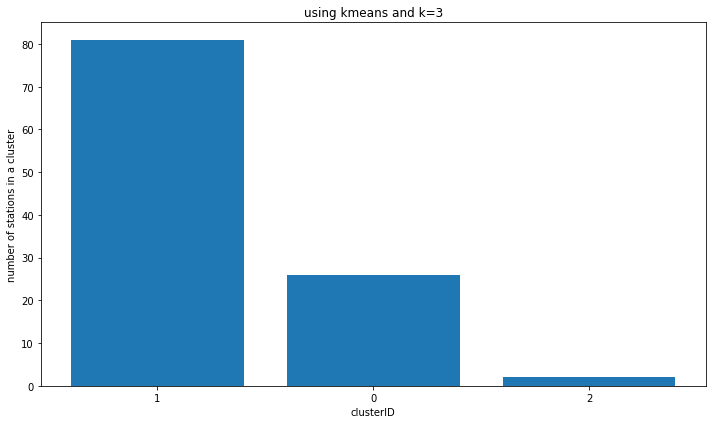

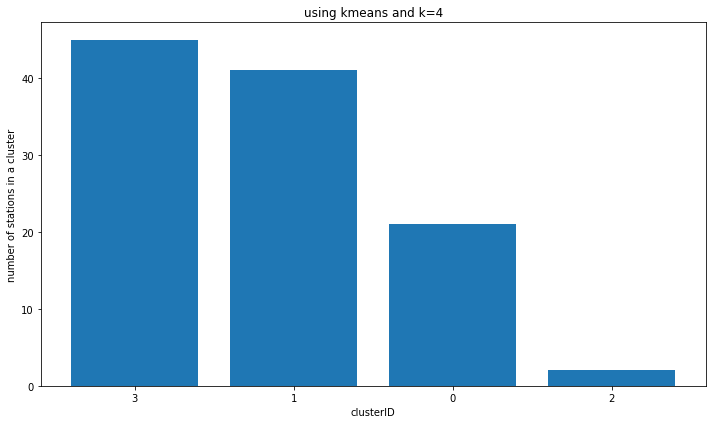

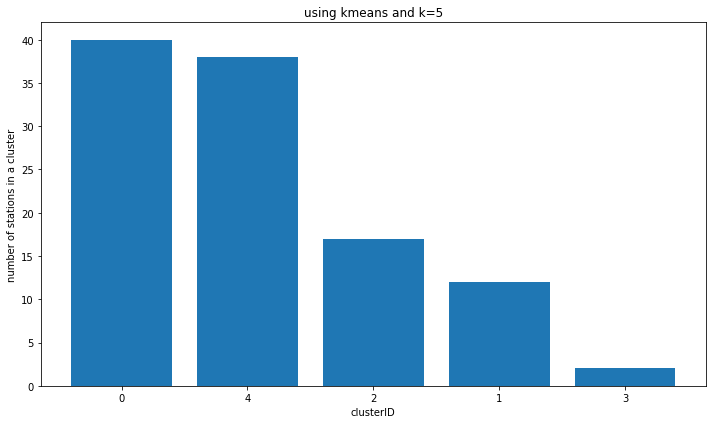

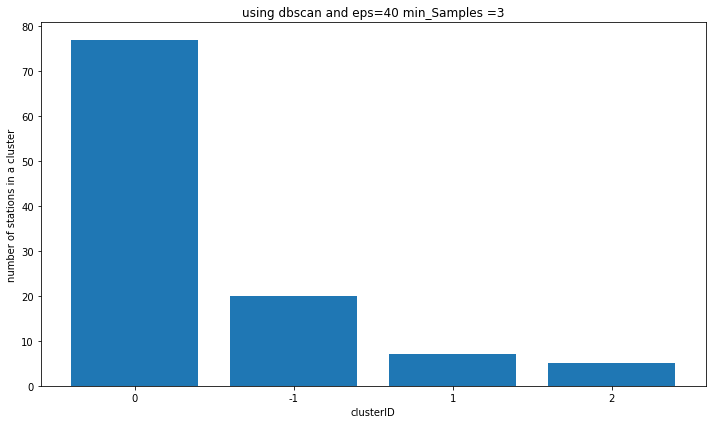

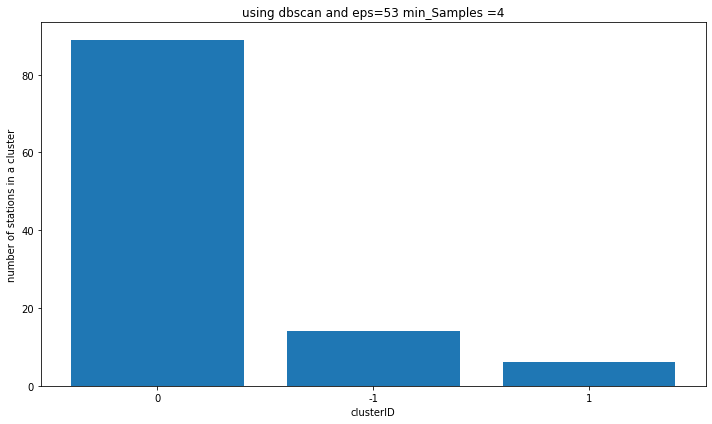

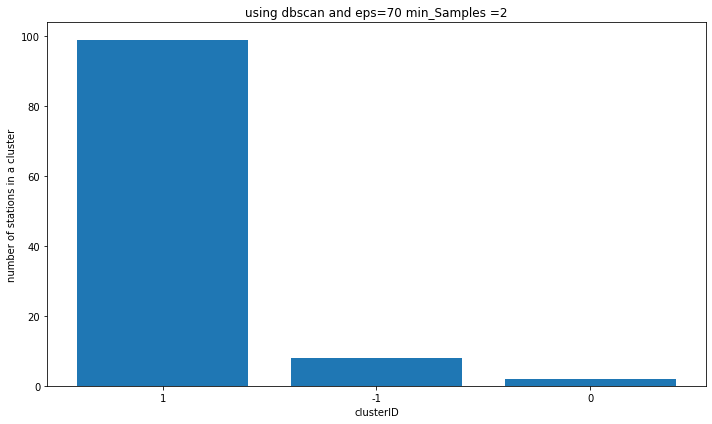

In [14]:
lab3=pd.DataFrame(k_means3.labels_,columns=['label'])
# print(lab3)
sdf =  psql.sqldf("select label,count(*) as cc from lab3 group by label order by cc desc")
fig = plt.figure(figsize=(10, 6),tight_layout=True)
sdf["label"]=sdf["label"].astype(str)
plt.bar(sdf['label'],sdf['cc'],align = 'center')
plt.xlabel('clusterID')
plt.ylabel('number of stations in a cluster')
plt.title('using kmeans and k=3')
plt.show()

lab4=pd.DataFrame(k_means4.labels_,columns=['label'])
# print(lab4)
sdf =  psql.sqldf("select label,count(*) as cc from lab4 group by label order by cc desc")
fig = plt.figure(figsize=(10, 6),tight_layout=True)
sdf["label"]=sdf["label"].astype(str)
plt.bar(sdf['label'],sdf['cc'],align = 'center')
plt.xlabel('clusterID')
plt.ylabel('number of stations in a cluster')
plt.title('using kmeans and k=4')
plt.show()

lab5=pd.DataFrame(k_means5.labels_,columns=['label'])
# print(lab5)
sdf =  psql.sqldf("select label,count(*) as cc from lab5 group by label order by cc desc")
fig = plt.figure(figsize=(10, 6),tight_layout=True)
sdf["label"]=sdf["label"].astype(str)
plt.bar(sdf['label'],sdf['cc'],align = 'center')
plt.xlabel('clusterID')
plt.ylabel('number of stations in a cluster')
plt.title('using kmeans and k=5')
plt.show()

#DBSCAN GRAPHS
lab5=pd.DataFrame(db1.labels_,columns=['label'])
# print(lab5)
sdf =  psql.sqldf("select label,count(*) as cc from lab5 group by label order by cc desc")
fig = plt.figure(figsize=(10, 6),tight_layout=True)
sdf["label"]=sdf["label"].astype(str)
plt.bar(sdf['label'],sdf['cc'],align = 'center')
plt.xlabel('clusterID')
plt.ylabel('number of stations in a cluster')
plt.title('using dbscan and eps=40 min_Samples =3')
plt.show()
lab5=pd.DataFrame(db2.labels_,columns=['label'])
# print(lab5)
sdf =  psql.sqldf("select label,count(*) as cc from lab5 group by label order by cc desc")
fig = plt.figure(figsize=(10, 6),tight_layout=True)
sdf["label"]=sdf["label"].astype(str)
plt.bar(sdf['label'],sdf['cc'],align = 'center')
plt.xlabel('clusterID')
plt.ylabel('number of stations in a cluster')
plt.title('using dbscan and eps=53 min_Samples =4')
plt.show()
lab5=pd.DataFrame(db3.labels_,columns=['label'])
# print(lab5)
sdf =  psql.sqldf("select label,count(*) as cc from lab5 group by label order by cc desc")
fig = plt.figure(figsize=(10, 6),tight_layout=True)
sdf["label"]=sdf["label"].astype(str)
plt.bar(sdf['label'],sdf['cc'],align = 'center')
plt.xlabel('clusterID')
plt.ylabel('number of stations in a cluster')
plt.title('using dbscan and eps=70 min_Samples =2')
plt.show()

### Task 4.3

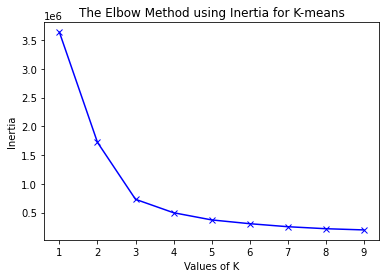

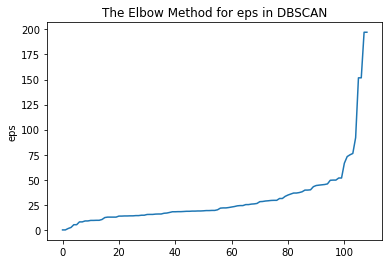

In [15]:
inertias = []
for k in range(1,10):
    k_means = cluster.KMeans(n_clusters=k, init='k-means++', random_state=5000)
    k_means.fit(df4[['fromCNT_4','fromCNT_5','fromCNT_6','rebalCNT_4','rebalCNT_5','rebalCNT_6']])
    inertias.append(k_means.inertia_)
plt.plot(range(1,10), inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia for K-means')
plt.show()

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df4[['fromCNT_4','fromCNT_5','fromCNT_6','rebalCNT_4','rebalCNT_5','rebalCNT_6']])
distances, indices = nbrs.kneighbors(df4[['fromCNT_4','fromCNT_5','fromCNT_6','rebalCNT_4','rebalCNT_5','rebalCNT_6']])
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
##plt.xlabel('Values of K')
plt.ylabel('eps')
plt.title('The Elbow Method for eps in DBSCAN')
plt.show()

a)K=4 seems like an ideal choice because as shown in the above graph, we see the the elbow at K=4 i.e inertia values linearly decreasing after k=4. 
Inertia: It is the sum of squared distances of samples to their closest cluster center.

b) I think the best is K-means. Because for k-means I could decide the value of k using elbow method. But for DBSCAN I couldn't find what the ideal min_samples is due to the high dimensions.